
## CALCULATE DEGREE

O(n + sum(deg[i])) <= O(n + n) = O(n)

sum(deg[i]) <= n-1 -> its a tree


## CALCULATE QUEUE

O(n)


## CALCULATE TIME ON TOPOLOGICAL ORDER

O(n)

O(n) + O(sum(deg[i])) = O(n) + O(n) = O(n)

It will process each node once and each edge once

In [6]:
# adj[i] -> list of neighbors of i

import numpy as np

def asap(adj, d):
    n = len(adj)
    prov_deg = np.zeros(n, dtype=int)

    # CALCULATE DEGREE
    # O(n + sum(deg[i])) <= O(n + n) = O(n)
    # sum(deg[i]) <= n-1 -> its a tree
    for i in range(n): # O(n)
        for neighbor in adj[i]: # O(deg[i])
            prov_deg[neighbor] += 1
    
    #CALCULATE QUEUE
    # O(n)
    q = []
    for i in range(n): # O(n)
        if prov_deg[i] == 0:
            q.append(i)
    t = np.zeros(n, dtype=int)

    #CALCULATE TIME ON TOPOLOGICAL ORDER
    # O(n)
    # O(n) + O(sum(deg[i])) = O(n) + O(n) = O(n)
    # It will process each node once and each edge once
    while q: # O(n)
        i = q.pop()
        
        for j in adj[i]: # O(deg[i])
            prov_deg[j] -= 1
            t[j] = max(t[j], t[i] + d[i])
            if prov_deg[j] == 0:
                q.append(j)
    return t

In [13]:
adjacency_list = {
    0: [2],
    1: [2],
    2: [3],
    3: [4],
    4: [],
    5: [6],
    6: [4],
    7: [8],
    8: [],
    9: [10],
    10: []
}

N = 11

resp = asap(adjacency_list, np.ones(N))

print(resp)
for i in range(N):
    print(f"Node {i+1} -> {resp[i]}")

[0 0 1 2 3 0 1 0 1 0 1]
Node 1 -> 0
Node 2 -> 0
Node 3 -> 1
Node 4 -> 2
Node 5 -> 3
Node 6 -> 0
Node 7 -> 1
Node 8 -> 0
Node 9 -> 1
Node 10 -> 0
Node 11 -> 1


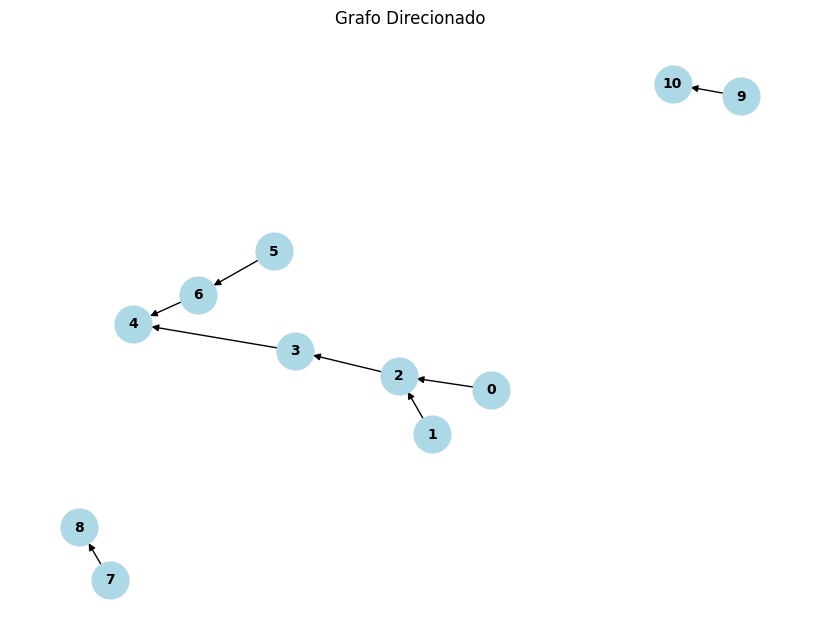

In [17]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

for node, neighbors in adjacency_list.items():
    for neighbor in neighbors:
        G.add_edge(node, neighbor)

plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color="lightblue", font_size=10, font_weight="bold", arrows=True)
plt.title("Grafo Direcionado")
plt.show()